In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
olist_order_payments = pd.read_csv('Datasets/olist_order_payments_dataset.csv')

olist_order_items = pd.read_csv('Datasets/olist_order_items_dataset.csv')

olist_order_reviews = pd.read_csv('Datasets/olist_order_reviews_dataset.csv')

olist_products = pd.read_csv('Datasets/olist_products_dataset.csv')

olist_sellers = pd.read_csv('Datasets/olist_sellers_dataset.csv')

olist_geolocation = pd.read_csv('Datasets/olist_geolocation_dataset.csv')

olist_product_names = pd.read_csv('Datasets/product_category_name_translation.csv')

olist_customers = pd.read_csv('Datasets/olist_customers_dataset.csv')

olist_orders = pd.read_csv('Datasets/olist_orders_dataset.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:

# Load the datasets
df_items = pd.read_csv('Datasets/olist_order_items_dataset.csv')
df_payments = pd.read_csv('Datasets/olist_order_payments_dataset.csv')

# Merge the datasets on 'order_id'
df = pd.merge(df_items, df_payments, on='order_id')

# Preprocessing: Remove rows with missing values
df = df.dropna()


In [ ]:
df

In [ ]:
# Feature Selection: Select only the features that will be used to train the model
features = ['payment_sequential', 'payment_installments', 'payment_value']
target = 'price'
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection: Choose a model
model = LinearRegression()

# Model Training: Train the model on the data
model.fit(X_train, y_train)

# Model Evaluation: Test the model on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Model Optimization: In this case, we're using a simple model (linear regression) that doesn't have any parameters to tune. 
# If you were using a more complex model, this is where you would try to optimize its parameters to improve performance.

In [ ]:
olist_products

In [ ]:
olist_order_payments

In [ ]:
olist_order_items

In [ ]:
olist_order_items[olist_order_items.duplicated(['product_id'])]

In [ ]:
olist_order_items[olist_order_items['product_id'] == '28b4eced95a52d9c437a4caf9d311b95']

In [ ]:
df = pd.read_csv('data.csv',encoding='latin-1')
df

In [ ]:
df.nunique()

In [ ]:
df[df['StockCode'] == '85123A']

In [ ]:
!pip install autoscraper

In [ ]:
from autoscraper import AutoScraper

In [ ]:
amazon_url  = 'https://www.amazon.in/s?k=headphones'

In [ ]:
wanted_list = ["₹1,499","boAt Rockerz 450 Bluetooth On Ear Headphones with Mic, Upto 15 Hours Playback, 40MM Drivers, Padded Ear Cushions, Integrated Controls and Dual Modes(Luscious Black)",  "112,478"]

In [ ]:
scraper = AutoScraper()

In [ ]:
result = scraper.build(amazon_url,wanted_list)

In [ ]:
print(result)

In [ ]:
import requests

response = requests.get(amazon_url)
print(response.text)

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [115]:
url = "https://www.amazon.com/s?k=headphones&crid=3PUTYP5K2ZENT&sprefix=head%2Caps%2C308&ref=nb_sb_ss_ts-doa-p_1_4"

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.4.1 Safari/605.1.15',
    'Accept-Language': 'en-US,en;q=0.5'
}


In [117]:
webpage = requests.get(url, headers=headers)

In [118]:
type(webpage.content)

bytes

In [119]:
webpage

<Response [200]>

In [120]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(webpage.content,'html.parser')

In [121]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [122]:
links = soup.find_all('a', attrs={'class':'a-link-normal s-no-outline'})

In [123]:
links

[<a class="a-link-normal s-no-outline" href="/sspa/click?ie=UTF8&amp;spc=MTo2OTI0NTU5Nzg5NjAyMTIyOjE3MTQ2MTUwNDc6c3BfYXRmOjMwMDAxODI4OTUzMTgwMjo6MDo6&amp;url=%2FClassroom-Headphones-Bulk-Earphones-Airplane-Learning%2Fdp%2FB0BP9Y2WS2%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3PUTYP5K2ZENT%26dib%3DeyJ2IjoiMSJ9.9fDx1cBMgJF33vry_dQivucM2DQrbajVM8c3mJgU9xVobPFrWXl4s4fAz3sxxAfMKDMgHzEWZFZJNoDJtVnOB5vhxJv8tBXtXgNBCe4GmqwSWBBboG_rPaqZK5nid0bzUb7p0sVxBwSIhqJNkz8lJIH7TLFkHaoizLbLNNU-2SpI0tc_sVWJR3HecXeg3Le4q3Y9lDdaniBUNKz8J5u7y6Kdlv6LoUtPww3y-Ee-Bxk.phhUidXrClwUx_nJVJrIXEkAmPmdBtvdNevSorBKBLg%26dib_tag%3Dse%26keywords%3Dheadphones%26qid%3D1714615047%26sprefix%3Dhead%252Caps%252C308%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1"><div class="a-section aok-relative s-image-fixed-height"><img alt="Sponsored Ad - Classroom Headphones-Bulk 10-Pack, Student On Ear Comfy Swivel Earphones for Library, School, Airplane, Kid..." class="s-image" data-image-index="1" data-image-latency="s-product-image" d

In [124]:
link = links[0].get('href')

In [125]:
link

'/sspa/click?ie=UTF8&spc=MTo2OTI0NTU5Nzg5NjAyMTIyOjE3MTQ2MTUwNDc6c3BfYXRmOjMwMDAxODI4OTUzMTgwMjo6MDo6&url=%2FClassroom-Headphones-Bulk-Earphones-Airplane-Learning%2Fdp%2FB0BP9Y2WS2%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3PUTYP5K2ZENT%26dib%3DeyJ2IjoiMSJ9.9fDx1cBMgJF33vry_dQivucM2DQrbajVM8c3mJgU9xVobPFrWXl4s4fAz3sxxAfMKDMgHzEWZFZJNoDJtVnOB5vhxJv8tBXtXgNBCe4GmqwSWBBboG_rPaqZK5nid0bzUb7p0sVxBwSIhqJNkz8lJIH7TLFkHaoizLbLNNU-2SpI0tc_sVWJR3HecXeg3Le4q3Y9lDdaniBUNKz8J5u7y6Kdlv6LoUtPww3y-Ee-Bxk.phhUidXrClwUx_nJVJrIXEkAmPmdBtvdNevSorBKBLg%26dib_tag%3Dse%26keywords%3Dheadphones%26qid%3D1714615047%26sprefix%3Dhead%252Caps%252C308%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [126]:
product_list = "http://amazon.com" + link

In [127]:
product_list

'http://amazon.com/sspa/click?ie=UTF8&spc=MTo2OTI0NTU5Nzg5NjAyMTIyOjE3MTQ2MTUwNDc6c3BfYXRmOjMwMDAxODI4OTUzMTgwMjo6MDo6&url=%2FClassroom-Headphones-Bulk-Earphones-Airplane-Learning%2Fdp%2FB0BP9Y2WS2%2Fref%3Dsr_1_1_sspa%3Fcrid%3D3PUTYP5K2ZENT%26dib%3DeyJ2IjoiMSJ9.9fDx1cBMgJF33vry_dQivucM2DQrbajVM8c3mJgU9xVobPFrWXl4s4fAz3sxxAfMKDMgHzEWZFZJNoDJtVnOB5vhxJv8tBXtXgNBCe4GmqwSWBBboG_rPaqZK5nid0bzUb7p0sVxBwSIhqJNkz8lJIH7TLFkHaoizLbLNNU-2SpI0tc_sVWJR3HecXeg3Le4q3Y9lDdaniBUNKz8J5u7y6Kdlv6LoUtPww3y-Ee-Bxk.phhUidXrClwUx_nJVJrIXEkAmPmdBtvdNevSorBKBLg%26dib_tag%3Dse%26keywords%3Dheadphones%26qid%3D1714615047%26sprefix%3Dhead%252Caps%252C308%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [3]:
product_link_2 = "https://www.amazon.com/Apple-2024-MacBook-13-inch-Laptop/dp/B0CX22ZW1T/ref=sr_1_1?crid=2NUPOFNY1AUTP&dib=eyJ2IjoiMSJ9.6d1ivEKF9ITfXdoIONkPjgsojmW-QWfRqIWlUyVMA3r3yIc2LIKYq7BYETx_nJjcs8SwQVCkWZFBqVN09DAEyfHLFaLAZgeuXtfpFE3bvbxdnZ67cvecm6Y3v6Z7jkFYfPHGG26xEn4mvf-8ohmFBVrGgbYHtDSNuNJlBWMEzvLnGyilFg49qMgDCJpNe_Plwtkw5gGj2ZeoAUjev98eBT4mEU7Yo0z6VGg7g6VwnbY.-y4A3ttUuHiZFtrZQ6p0buZJ-uR1Aw7cFSU_LwIlMOg&dib_tag=se&keywords=macbook&qid=1714677354&sprefix=macbook%2Caps%2C379&sr=8-1"

In [4]:
new_webpage_2 = requests.get(product_link_2,headers= headers)

In [5]:
new_webpage_2

<Response [200]>

In [6]:
new_soup_2 = BeautifulSoup(new_webpage_2.content,'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
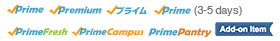

In [7]:
new_soup_2

In [8]:
new_soup_2.find('span',attrs= {'id':'productTitle'}).text.strip()

'Apple 2024 MacBook Air 13-inch Laptop with M3 chip: 13.6-inch Liquid Retina Display, 8GB Unified Memory, 256GB SSD Storage, Backlit Keyboard, 1080p FaceTime HD Camera, Touch ID; Space Gray'

In [192]:
new_soup_2.find('div', attrs={'class':'a-expander-content reviewText review-text-content a-expander-partial-collapse-content'})

<div aria-expanded="false" class="a-expander-content reviewText review-text-content a-expander-partial-collapse-content" data-hook="review-collapsed">
<span>Definitely not an iPhone..fast, light weight all together beautiful machine</span>
</div>

In [31]:
reviews = new_soup_2.find_all('div', attrs={'class':'a-expander-content reviewText review-text-content a-expander-partial-collapse-content'})

user_names = new_soup_2.find_all('div',attrs={'class':'a-profile-content'})
# Create an empty list to store all reviews
all_reviews = []
all_user_names =  []
# Iterate over the reviews and extract text
for review in reviews:
    all_reviews.append(review.text.strip())

for user_name in user_names:
    all_user_names.append(user_name.text.strip())
# Now all_reviews list contains all the reviews

In [32]:
all_reviews

['Definitely not an iPhone..fast, light weight all together beautiful machine',
 "The 13.6-inch Liquid Retina display delivers stunning visuals with vibrant colors and sharp details. The M3 chip offers blazing-fast performance, ensuring seamless multitasking and smooth operation. With 8GB of unified memory and 256GB SSD storage, it provides ample space for all your needs. The backlit keyboard and Touch ID add convenience and security, while the 1080p FaceTime HD camera ensures crystal-clear video calls. In Midnight color, it's not just a laptop; it's a statement of style and sophistication.",
 "I use my laptop for work purposes, connecting to all sorts of external multimedia equipment. I had a MacBook Pro for nearly a decade, and it was more than showing its great age. I knew I needed to upgrade, but I was worried about choosing the Air. I liked the features, I liked the slender form and low weight. I just worried it would not do what I needed it to do.I needn't have worried. This is b

In [33]:
all_user_names

['2024 MacBook Air with M3 ChipApple, Inc.',
 '',
 '',
 '',
 '',
 '',
 'Amazon Customer',
 'Amazon Customer',
 'JMG',
 'nachum zlotnick',
 'Abrahamo Linconi',
 'Thierry',
 'Thierry',
 'Nico',
 'Glencoe resident',
 'jason',
 'Guillermo M.',
 'Amazon Customer',
 'Teodor P',
 'Elise']

In [34]:
len(all_user_names)

20

In [128]:
new_webpage = requests.get(product_list,headers=headers)

In [129]:
new_webpage

<Response [200]>

In [182]:
type(new_soup_2)

bs4.BeautifulSoup

In [174]:
new_soup_2.find('img',attrs= {'class':"a-dynamic-image"})['src']

'https://m.media-amazon.com/images/I/71ItMeqpN3L.__AC_SY445_SX342_QL70_ML2_.jpg'

In [176]:
new_soup_2.find('span',attrs= {'class':'a-price a-text-price a-size-medium apexPriceToPay'}).find('span',attrs= {'class':'a-offscreen'}).text.strip()

'$909.88'

In [175]:
new_soup_2.find('div',attrs= {'class':"a-expander-content reviewText review-text-content a-expander-partial-collapse-content"}).text.strip()

'Definitely not an iPhone..fast, light weight all together beautiful machine'

In [40]:
rating = new_soup_2.find_all('span',attrs= {'class':'a-icon-alt'})
for rate in rating:
    print(rate.text.strip())

4.4 out of 5 stars
4.4 out of 5 stars
4.8 out of 5 stars
4.4 out of 5 stars
4.6 out of 5 stars
4.7 out of 5 stars
Previous page
Next page
4.4 out of 5 stars
5.0 out of 5 stars
Previous page
Next page
5 Stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
1.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
4.0 out of 5 stars
5.0 out of 5 stars
1.0 out of 5 stars
1.0 out of 5 stars


In [130]:
new_soup = BeautifulSoup(new_webpage.content,'html.parser')

In [149]:
type(new_soup)

bs4.BeautifulSoup

In [153]:
new_soup.find('td',attrs= {'class':'a-span12'}).find('span',attrs= {'class':'a-offscreen'}).text.strip()

'$119.99'

In [155]:
new_soup.find('span',attrs= {'id':'productTitle'}).text.strip()

'Raycon Fitness Headphones - Wireless Over-Ear-Headphones with 45 Hours of Battery, Active Noise Cancellation, Awareness Mode, 3 Quick Swap Ear Cushions, IPX4 Water Resistance (Black)'

In [136]:
new_soup.find('span',attrs= {'class':'a-price a-text-price a-size-medium'}).find('span',attrs= {'class':'a-offscreen'}).text

'$59.97'

In [138]:
new_soup.find('span',attrs= {'class':'a-icon-alt'}).text

'4.0 out of 5 stars'

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [140]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available



In [141]:

if __name__ == '__main__':

    # add your user agent 
    HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.4.1 Safari/605.1.15',
    'Accept-Language': 'en-US,en;q=0.5'
    }


    # The webpage URL
    URL = "https://www.amazon.com/s?k=headphones&crid=3PUTYP5K2ZENT&sprefix=head%2Caps%2C308&ref=nb_sb_ss_ts-doa-p_1_4"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)


ConnectionError: HTTPSConnectionPool(host='www.amazon.comhttps', port=443): Max retries exceeded with url: //aax-us-iad.amazon.com/x/c/RKm79ureT_-06IOXuxBdiMAAAAGPNxDuOQEAAAH2AQBvbm9fdHhuX2JpZDQgICBvbm9fdHhuX2ltcDEgICCsezsI/https://www.amazon.com/Active-Noise-Cancelling-Headphones-Comfortable/dp/B095BV8R27/ref=sxin_13_sbv_search_btf?content-id=amzn1.sym.975f7eae-0382-4fd6-bcc9-4efbfe9a9c95%3Aamzn1.sym.975f7eae-0382-4fd6-bcc9-4efbfe9a9c95&crid=3PUTYP5K2ZENT&cv_ct_cx=headphones&dib=eyJ2IjoiMSJ9.JtCw3uhJlMe_fTv0iYxTzg.cvsLmfJSgiRO7v7hK6NOj-1EJX8ZPBAOPSwHW6gB1I8&dib_tag=se&keywords=headphones&pd_rd_i=B095BV8R27&pd_rd_r=3c300886-7925-492c-8ddc-0e054c84af56&pd_rd_w=rGITT&pd_rd_wg=2Zs6n&pf_rd_p=975f7eae-0382-4fd6-bcc9-4efbfe9a9c95&pf_rd_r=2CWRWNEPV8A04DHP7940&qid=1714615807&sbo=RZvfv%2F%2FHxDF%2BO5021pAnSA%3D%3D&sprefix=head%2Caps%2C308&sr=1-1-5190daf0-67e3-427c-bea6-c72c1df98776 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x16a82a620>: Failed to resolve 'www.amazon.comhttps' ([Errno 8] nodename nor servname provided, or not known)"))

In [11]:
all_reviews

['Definitely not an iPhone..fast, light weight all together beautiful machine',
 "The 13.6-inch Liquid Retina display delivers stunning visuals with vibrant colors and sharp details. The M3 chip offers blazing-fast performance, ensuring seamless multitasking and smooth operation. With 8GB of unified memory and 256GB SSD storage, it provides ample space for all your needs. The backlit keyboard and Touch ID add convenience and security, while the 1080p FaceTime HD camera ensures crystal-clear video calls. In Midnight color, it's not just a laptop; it's a statement of style and sophistication.",
 "I use my laptop for work purposes, connecting to all sorts of external multimedia equipment. I had a MacBook Pro for nearly a decade, and it was more than showing its great age. I knew I needed to upgrade, but I was worried about choosing the Air. I liked the features, I liked the slender form and low weight. I just worried it would not do what I needed it to do.I needn't have worried. This is b

In [12]:
len(all_reviews)

11

In [20]:
from summarizer import Summarizer

# Concatenate all reviews into a single string
text = ' '.join(all_reviews)

# Initialize the summarizer
model = Summarizer()

# Generate the summary
summary = model(text, min_length=60, max_length=500)  # Adjust these parameters as needed

print(summary)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [21]:
from transformers import pipeline

# Initialize the summarization pipeline
summarizer = pipeline("summarization")

# Concatenate all reviews into a single string
all_reviews_text = "\n".join(all_reviews)

# Summarize the concatenated reviews
summary = summarizer(all_reviews_text, max_length=150, min_length=30, do_sample=False)

# Print the summarized text
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [42]:
for review in all_reviews:
    print(review)

Definitely not an iPhone..fast, light weight all together beautiful machine
The 13.6-inch Liquid Retina display delivers stunning visuals with vibrant colors and sharp details. The M3 chip offers blazing-fast performance, ensuring seamless multitasking and smooth operation. With 8GB of unified memory and 256GB SSD storage, it provides ample space for all your needs. The backlit keyboard and Touch ID add convenience and security, while the 1080p FaceTime HD camera ensures crystal-clear video calls. In Midnight color, it's not just a laptop; it's a statement of style and sophistication.
I use my laptop for work purposes, connecting to all sorts of external multimedia equipment. I had a MacBook Pro for nearly a decade, and it was more than showing its great age. I knew I needed to upgrade, but I was worried about choosing the Air. I liked the features, I liked the slender form and low weight. I just worried it would not do what I needed it to do.I needn't have worried. This is better in e

In [22]:
from textblob import TextBlob

# Calculate sentiment for each review
sentiments = [TextBlob(review).sentiment.polarity for review in all_reviews]

# Print average sentiment
print(sum(sentiments) / len(sentiments))

0.15380312868949234


In [23]:
sentiment_score = []
for review in all_reviews:
    sentiment_score.append(TextBlob(review).sentiment.polarity)
print(sentiment_score)

[0.4166666666666667, 0.19027777777777777, 0.34027777777777785, -0.06833333333333333, 0.07100108225108226, 0.4375, -0.025, 0.0, 0.3444444444444444, -0.05, 0.034999999999999976]


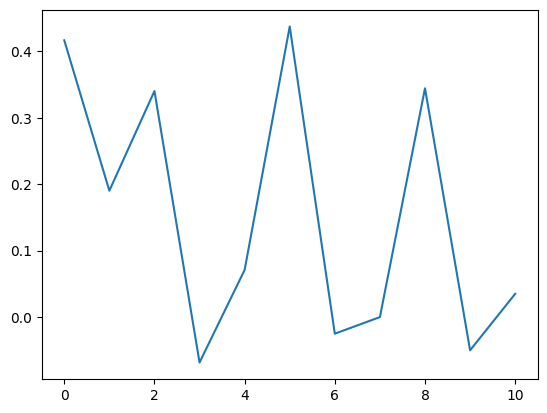

In [27]:
import matplotlib.pyplot as plt
plt.plot(sentiment_score)